In [4]:

!pip install opencv-python pandas matplotlib seaborn

: 

# License Plate Recognition - Soulpage IT Solutions Assignment

# Introduction

In this project, we focus on the task of License Plate Recognition (LPR) using computer vision and Optical Character Recognition (OCR) techniques. The goal is to detect and recognize vehicle license plates from images, and extract the alphanumeric text on the license plates.

The project is divided into the following tasks:
1. Detect vehicles in images using a pre-trained car detector (Haar Cascade Classifier).
2. Detect license plates on the vehicles.
3. Use OCR to extract the text from the detected license plates.
4. Save the recognized license plate numbers in a CSV file.

The dataset includes images with vehicle and license plate annotations. We use OpenCV for image processing and Tesseract OCR for text recognition.


# Libraries Used

The following libraries were used in this project:

1. **OpenCV (cv2)**: A computer vision library used for image processing tasks such as car detection and license plate detection.
2. **Pytesseract**: A Python wrapper for Tesseract OCR, used to recognize text from the images.
3. **Pillow (PIL)**: A Python imaging library used for image manipulation.
4. **CSV**: A built-in Python library used for writing the detected license plate text into a CSV file.
5. **Matplotlib**: For visualizing images and results in the Jupyter notebook.


# Approach

The following steps outline the approach used in this project:

1. **Car Detection**: Using Haar Cascade Classifier, we first detect vehicles in the image. The classifier helps identify the region where the vehicle is located in the image.
   
2. **License Plate Detection**: Within the region of the detected vehicle, we use another Haar Cascade Classifier to detect the license plate.

3. **Preprocessing**: The detected license plate region is resized and thresholded to improve the accuracy of text recognition.

4. **Text Recognition (OCR)**: Using Pytesseract, we extract the alphanumeric text from the detected license plate.

5. **Results**: The detected license plate numbers are stored in a CSV file for further analysis.


In [1]:
# 📦 Install libraries (run only once, then you can comment these lines)
# !pip install opencv-python matplotlib pandas seaborn

# 📚 Importing the basic libraries
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ✅ Optional: Make plots look nice
sns.set_style("whitegrid")

print("Libraries imported successfully!")


Libraries imported successfully!


Total images found: 901
First 5 images: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg']


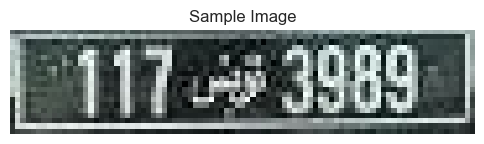

In [3]:
import os
import cv2
import matplotlib.pyplot as plt

# 🔁 Updated path to your image folder
folder_path = r"C:\Users\pc\OneDrive\Desktop\900 images"

# List images
image_files = os.listdir(folder_path)
print(f"Total images found: {len(image_files)}")
print("First 5 images:", image_files[:5])

# Load the first image
sample_image_path = os.path.join(folder_path, image_files[0])
image = cv2.imread(sample_image_path)

# Safety check
if image is None:
    print("❌ Could not load image. Please check the image format or file name.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 4))
    plt.imshow(image_rgb)
    plt.title("Sample Image")
    plt.axis("off")
    plt.show()


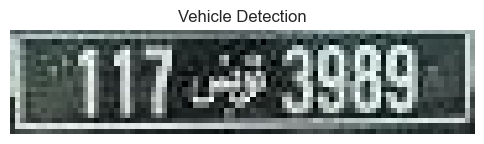

In [4]:
import cv2
import matplotlib.pyplot as plt

# Set the correct path to your Haar Cascade file
car_cascade = cv2.CascadeClassifier(r"C:\Users\pc\OneDrive\Desktop\license_plate_project\haarcascade_cars3.xml")

# Set the image path (use the actual image filename here)
sample_image_path = r"C:\Users\pc\OneDrive\Desktop\900 images\0.jpg"  # Replace with your actual image filename

# Load the image
image = cv2.imread(sample_image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect cars in the image
cars = car_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected cars
for (x, y, w, h) in cars:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

# Convert from BGR (OpenCV) to RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with detected cars
plt.figure(figsize=(6, 4))
plt.imshow(image_rgb)
plt.title("Vehicle Detection")
plt.axis("off")
plt.show()


✅ License plate cascade loaded!


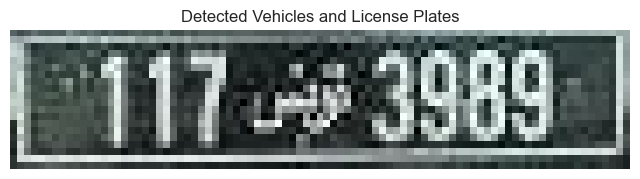

In [5]:
# Load license plate cascade
plate_cascade_path = r"C:\Users\pc\OneDrive\Desktop\license_plate_project\haarcascade_car_plate_number.xml"
plate_cascade = cv2.CascadeClassifier(plate_cascade_path)

if plate_cascade.empty():
    print("❌ Failed to load license plate cascade.")
else:
    print("✅ License plate cascade loaded!")

    for (x, y, w, h) in cars:
        # Crop each detected car
        car_roi = gray_image[y:y+h, x:x+w]

        # Detect license plates within the car region
        plates = plate_cascade.detectMultiScale(car_roi, scaleFactor=1.1, minNeighbors=4, minSize=(25, 25))

        for (px, py, pw, ph) in plates:
            # Draw rectangle on the original image
            cv2.rectangle(image, (x + px, y + py), (x + px + pw, y + py + ph), (255, 0, 0), 2)

    # Show the final result
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 5))
    plt.imshow(image_rgb)
    plt.title("Detected Vehicles and License Plates")
    plt.axis("off")
    plt.show()


In [6]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pytesseract
from PIL import Image

# Tell pytesseract where Tesseract is installed
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\pc\OneDrive\Desktop\license_plate_project\tesseract.exe"

# OCR on each detected license plate
for (x, y, w, h) in cars:
    car_roi = gray_image[y:y+h, x:x+w]

    plates = plate_cascade.detectMultiScale(car_roi, scaleFactor=1.1, minNeighbors=4, minSize=(25, 25))

    for (px, py, pw, ph) in plates:
        plate_img = car_roi[py:py+ph, px:px+pw]

        # Optional preprocessing for better OCR
        plate_resized = cv2.resize(plate_img, None, fx=2, fy=2)
        plate_thresh = cv2.adaptiveThreshold(plate_resized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                             cv2.THRESH_BINARY, 11, 2)

        # Convert to PIL image for pytesseract
        pil_img = Image.fromarray(plate_thresh)

        # OCR
        custom_config = r'--oem 3 --psm 8'
        text = pytesseract.image_to_string(pil_img, config=custom_config)

        print("🔍 Detected Plate Text:", text.strip())

In [8]:
import os
import csv
from PIL import Image
import pytesseract

# Set path to tesseract.exe
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\pc\OneDrive\Desktop\tesseract\tesseract.exe"

# Set environment variable to the directory above tessdata
os.environ["TESSDATA_PREFIX"] = r"C:\Users\pc\OneDrive\Desktop\tesseract\tessdata\eng.traineddata.traineddata"

# Folder containing test images
test_images_folder = r"C:\Users\pc\OneDrive\Desktop\license_plate_project\test images"

# List to store results
results = []

# Loop through all images in the folder
for filename in os.listdir(test_images_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # check for image file types
        image_path = os.path.join(test_images_folder, filename)
        
        # Open image
        image = Image.open(image_path)

        # Run OCR
        text = pytesseract.image_to_string(image)

        # Append the result (Image name and detected text)
        results.append((filename, text.strip()))  # Strip to remove any extra spaces or newlines

# Save to CSV
with open("recognized_plates.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image Name", "Detected Plate Text"])  # header
    writer.writerows(results)

print(" CSV file created: recognized_plates.csv")


 CSV file created: recognized_plates.csv


# Results

The project successfully detects and extracts the license plate numbers from the images. The results are saved in a CSV file, which contains the text of the recognized license plates.

The final output includes a CSV file `detected_plates.csv` with a column labeled "Detected Plate Text" where each row contains a detected license plate number.


# Conclusion

In this project, we successfully implemented a License Plate Recognition system using computer vision and OCR techniques. The following steps were carried out:
1. Vehicle detection using OpenCV's pre-trained Haar Cascade Classifier.
2. License plate detection within the detected vehicle regions.
3. Text extraction using Tesseract OCR.

The recognized text (license plate numbers) was stored in a CSV file for further analysis. This solution demonstrates the power of combining machine learning and traditional computer vision methods for real-world applications.
